In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('C:/College/Semester 5/Computer Vision/Project/Jupyter/cek'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\angry\im13.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\angry\im15.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\angry\im18.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\angry\im6.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\angry\im9.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\disgust\im12.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\disgust\im2.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\disgust\im21.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\disgust\im7.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\disgust\im9.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\fear\im0.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test\fear\im11.png
C:/College/Semester 5/Computer Vision/Project/Jupyter/cek\test

In [2]:
train_dir = 'C:/College/Semester 5/Computer Vision/Project/Jupyter/cek/train'
test_dir = 'C:/College/Semester 5/Computer Vision/Project/Jupyter/cek/test'

In [3]:
num_train_folders = len([folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))])
num_test_folders = len([folder for folder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, folder))])

print(f"Number of folders (classes) in the train directory: {num_train_folders}")
print(f"Number of folders (classes) in the test directory: {num_test_folders}")

Number of folders (classes) in the train directory: 7
Number of folders (classes) in the test directory: 7


In [4]:
def get_subfolders_and_image_counts(directory):
    subfolders = {}
    for subdir, dirs, files in os.walk(directory):
        if dirs:
            for folder in dirs:
                folder_path = os.path.join(subdir, folder)
                num_images = len([file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
                subfolders[folder] = num_images
    return subfolders

train_subfolders = get_subfolders_and_image_counts(train_dir)
test_subfolders = get_subfolders_and_image_counts(test_dir)

In [5]:
print("Training Subfolders and Image Counts:")
for folder, count in train_subfolders.items():
    print(f"{folder}: {count} images")

print("\nTest Subfolders and Image Counts:")
for folder, count in test_subfolders.items():
    print(f"{folder}: {count} images")

Training Subfolders and Image Counts:
angry: 8 images
disgust: 8 images
fear: 9 images
happy: 16 images
neutral: 12 images
sad: 8 images
surprise: 12 images

Test Subfolders and Image Counts:
angry: 5 images
disgust: 5 images
fear: 5 images
happy: 5 images
neutral: 5 images
sad: 5 images
surprise: 6 images


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'] * 2,
    'Count': [3171, 4097, 3995, 4965, 4830, 436, 7215, 831, 1024, 958, 1233, 1247, 111, 1774],
    'Dataset': ['Training'] * 7 + ['Test'] * 7
}

df = pd.DataFrame(data)

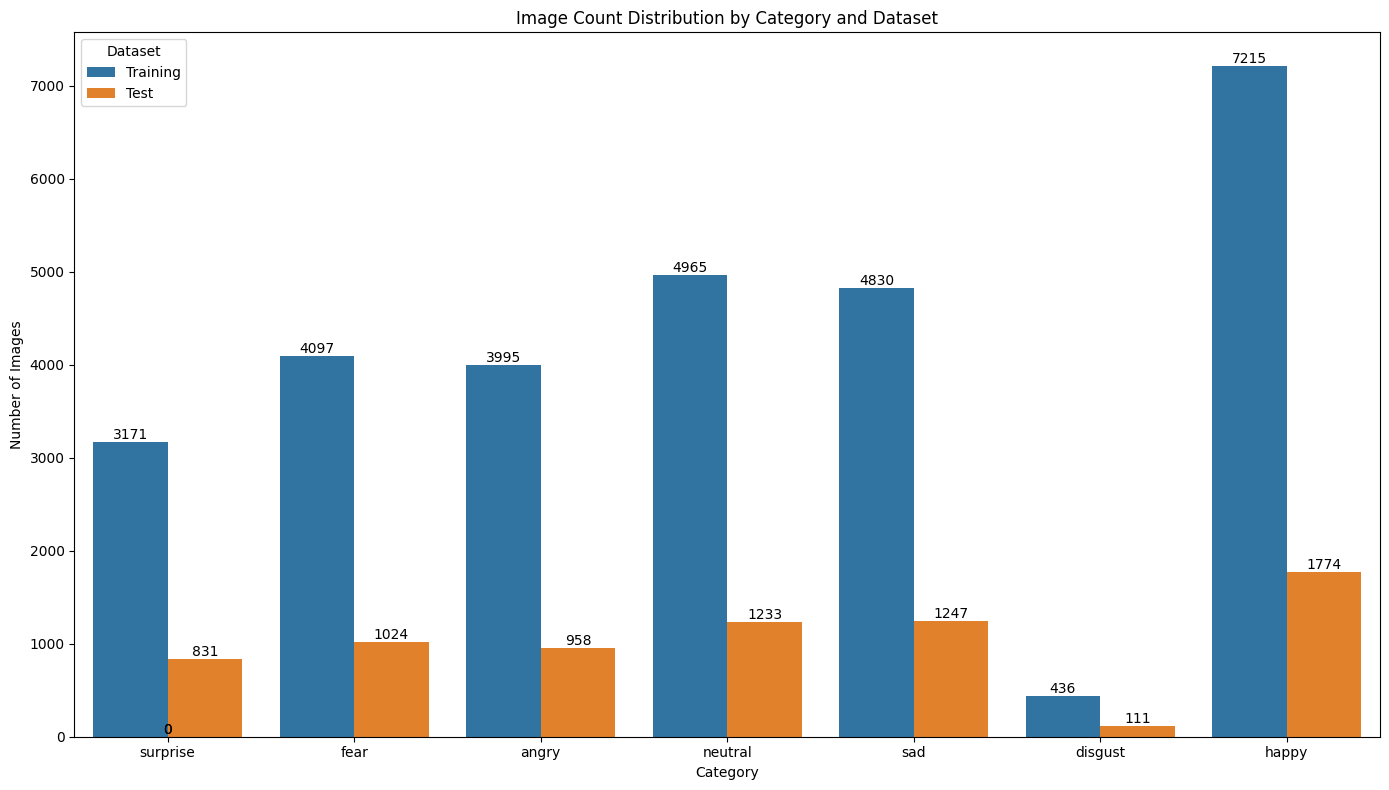

In [8]:
plt.figure(figsize=(14, 8))

ax = sns.barplot(x='Category', y='Count', hue='Dataset', data=df)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='bottom', fontsize=10)

plt.title('Image Count Distribution by Category and Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.legend(title='Dataset')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
train_counts = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'],
    'Count': [3171, 4097, 3995, 4965, 4830, 436, 7215]
}

test_counts = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'],
    'Count': [831, 1024, 958, 1233, 1247, 111, 1774]
}

df_train = pd.DataFrame(train_counts)
df_test = pd.DataFrame(test_counts)

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]])

fig.add_trace(go.Pie(
    labels=df_train['Category'],
    values=df_train['Count'],
    name='Training Dataset',
    hoverinfo='label+percent',
    title='Training Dataset Distribution'
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=df_test['Category'],
    values=df_test['Count'],
    name='Test Dataset',
    hoverinfo='label+percent',
    title='Test Dataset Distribution'
), row=1, col=2)

fig.update_layout(title_text='Dataset Distribution', title_x=0.5)

fig.show()

In [11]:
total_train = df_train['Count'].sum()
total_test = df_test['Count'].sum()

In [12]:
df_train['Percentage'] = (df_train['Count'] / total_train) * 100
df_test['Percentage'] = (df_test['Count'] / total_test) * 100

print("Training Dataset Percentages:")
for _, row in df_train.iterrows():
    print(f"{row['Category'].capitalize()}: {row['Percentage']:.2f}%")

print("\nTest Dataset Percentages:")
for _, row in df_test.iterrows():
    print(f"{row['Category'].capitalize()}: {row['Percentage']:.2f}%")

Training Dataset Percentages:
Surprise: 11.05%
Fear: 14.27%
Angry: 13.92%
Neutral: 17.29%
Sad: 16.82%
Disgust: 1.52%
Happy: 25.13%

Test Dataset Percentages:
Surprise: 11.58%
Fear: 14.27%
Angry: 13.35%
Neutral: 17.18%
Sad: 17.37%
Disgust: 1.55%
Happy: 24.71%


In [13]:
import cv2

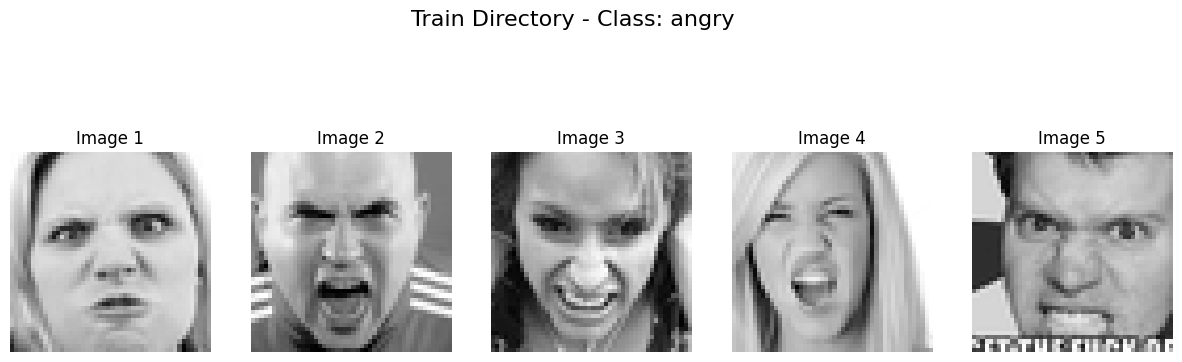

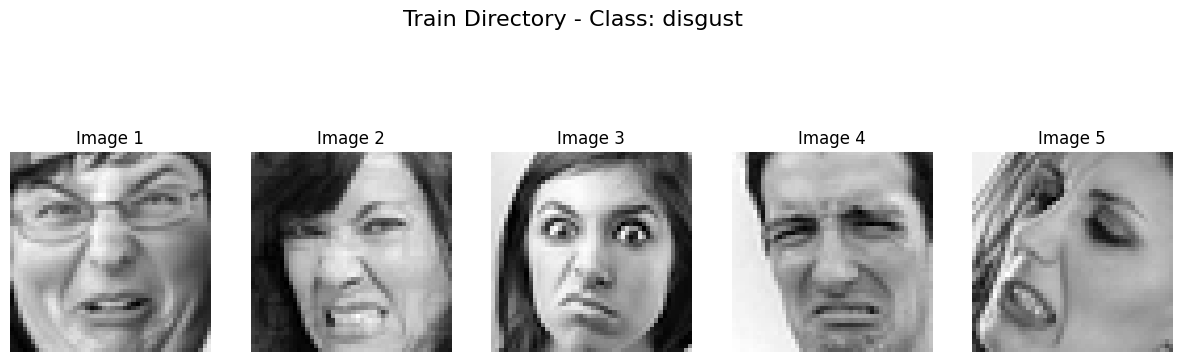

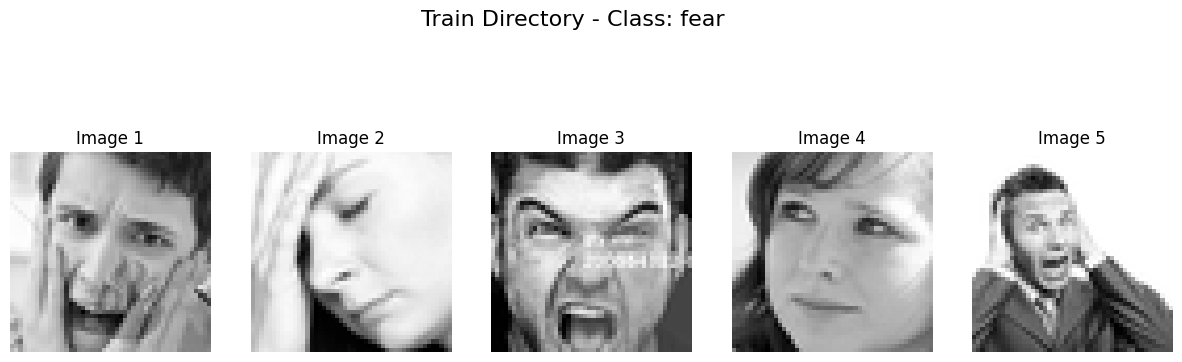

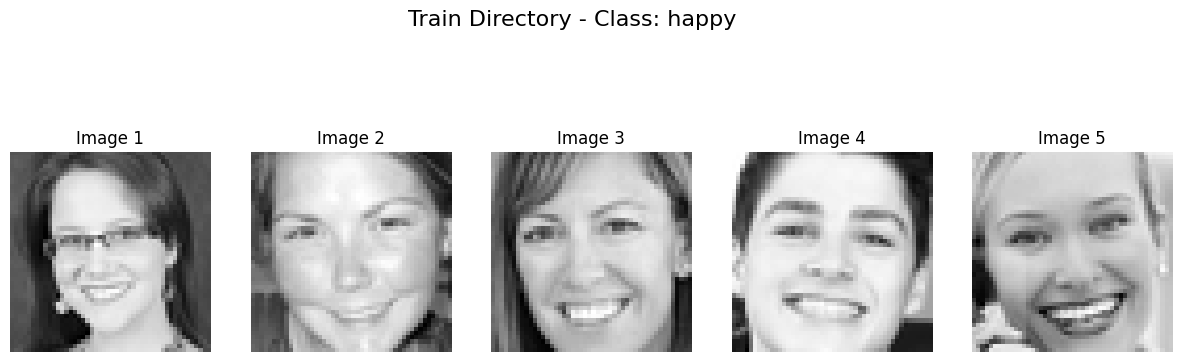

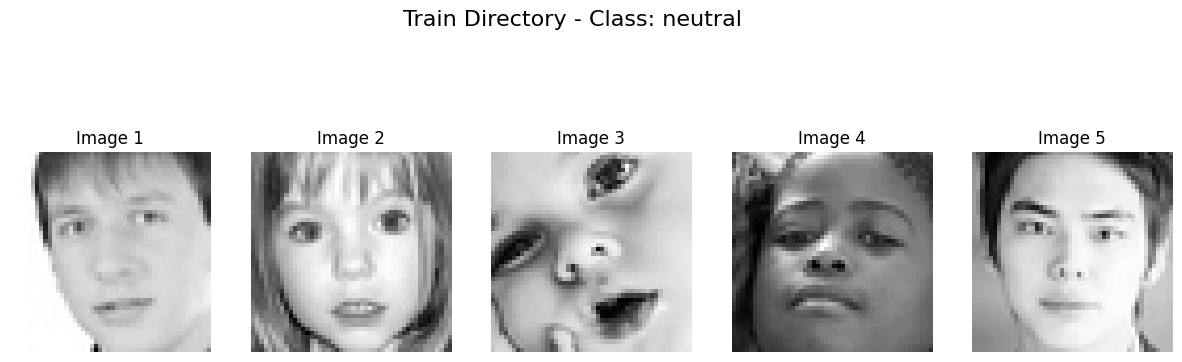

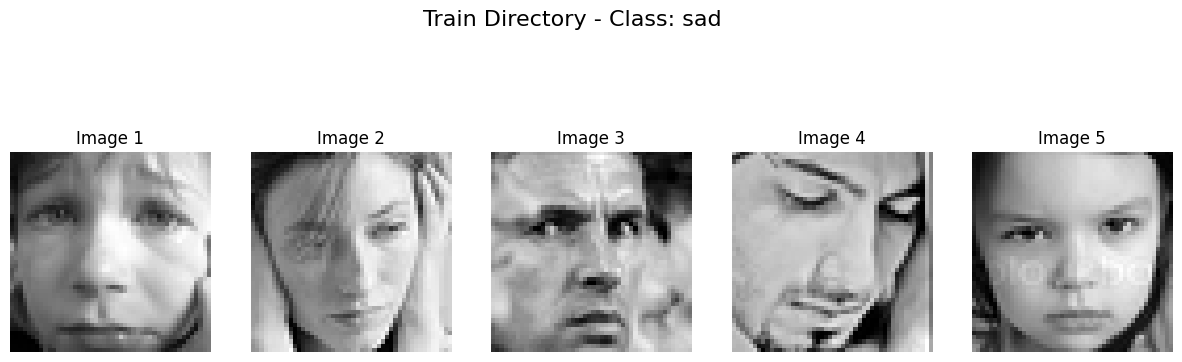

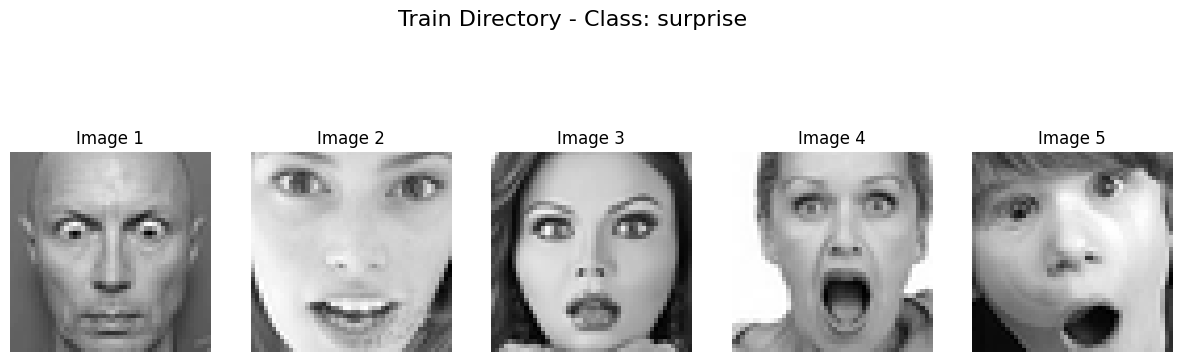

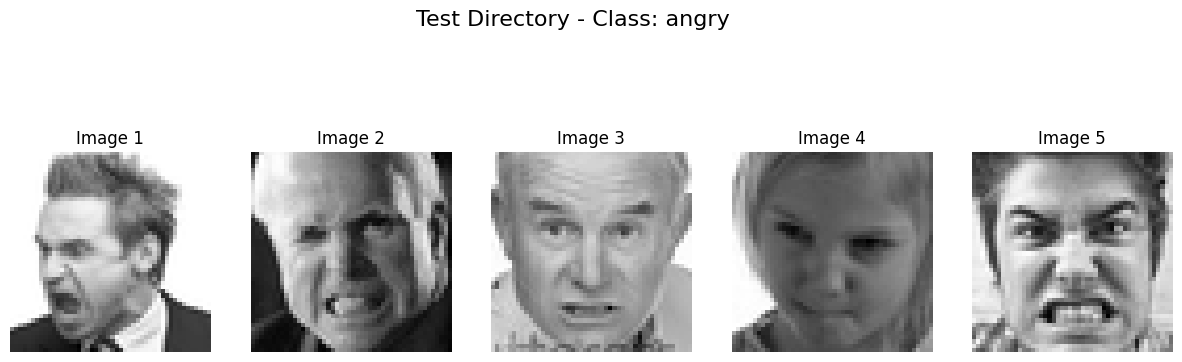

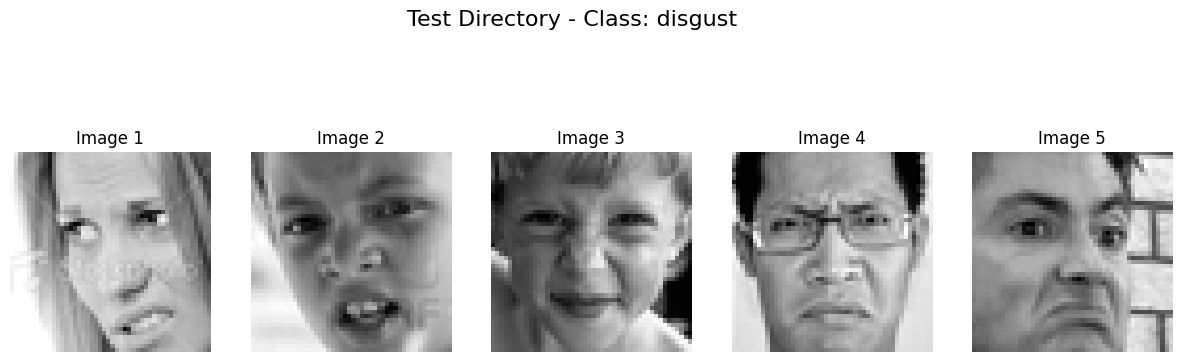

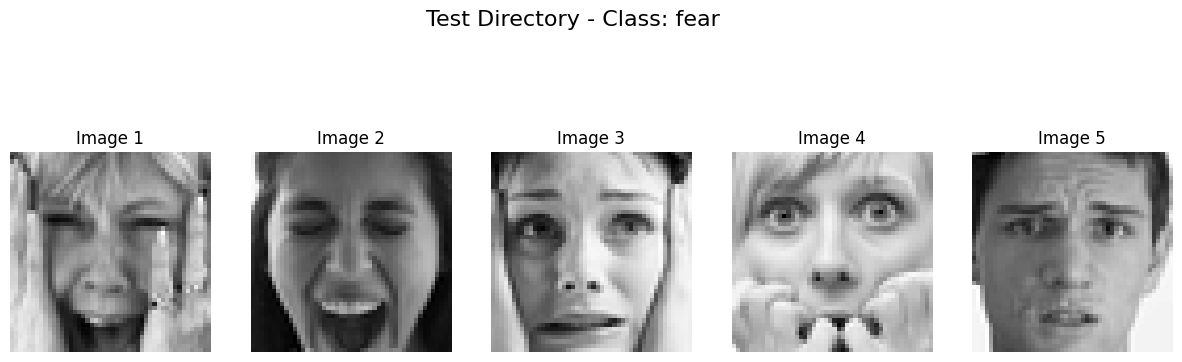

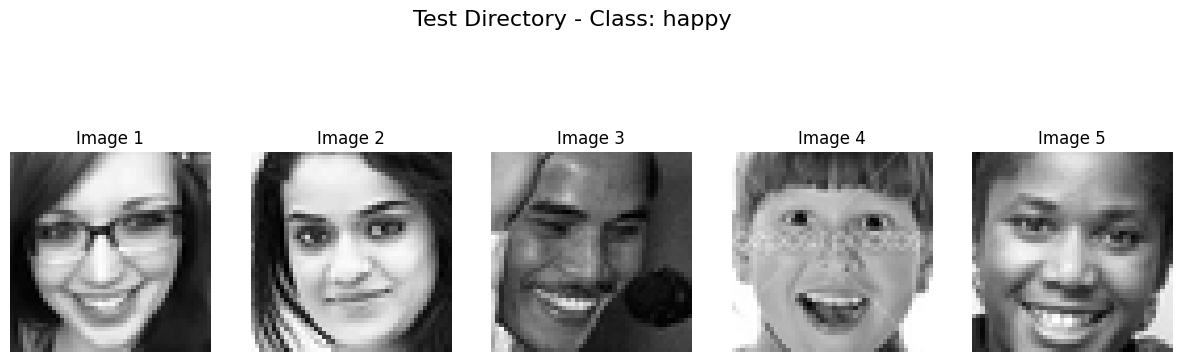

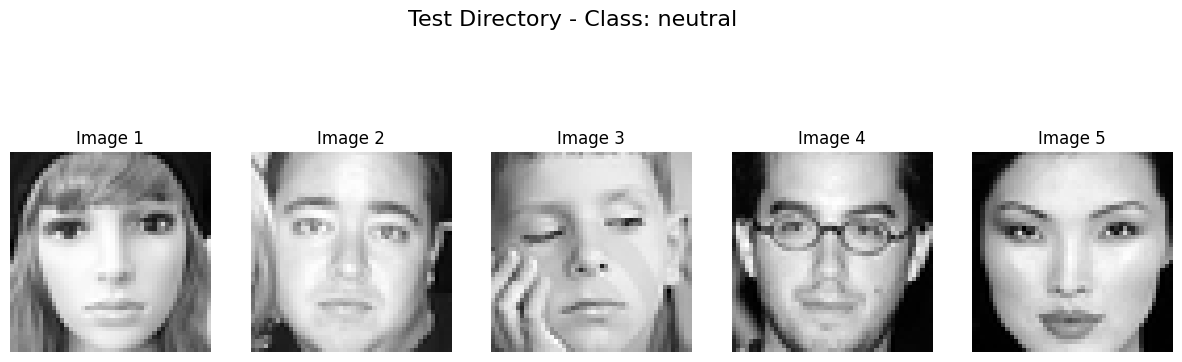

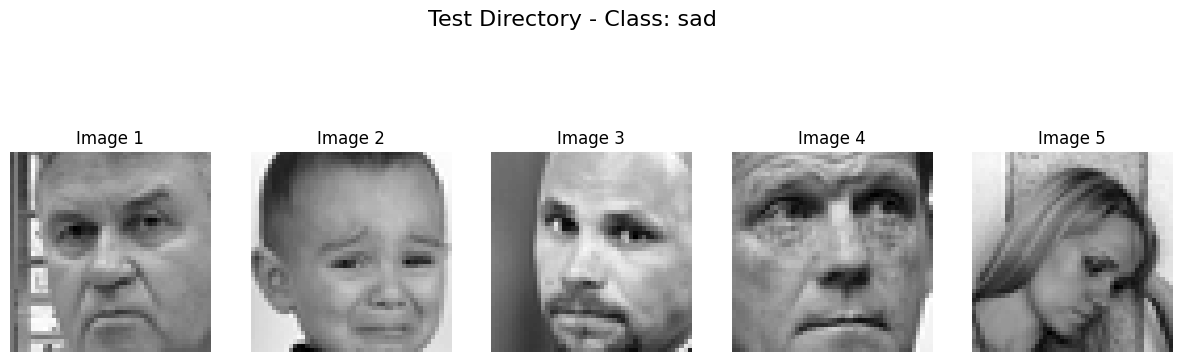

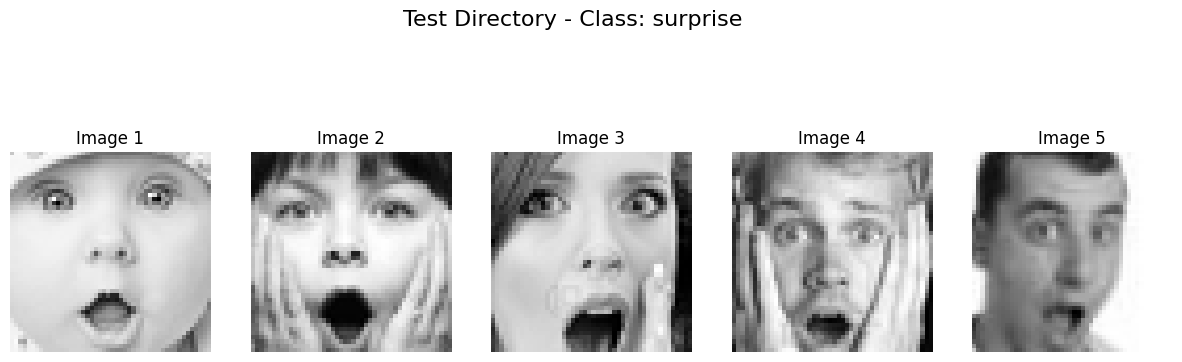

In [14]:
def display_images_from_folders(directory, title):
 
    folders = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    
    for folder in folders:
        folder_path = os.path.join(directory, folder)
        image_files = os.listdir(folder_path)[:5]  
        
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))
        fig.suptitle(f"{title} - Class: {folder}", fontsize=16)
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            axes[i].imshow(image, cmap='gray')
            axes[i].axis('off')  
            axes[i].set_title(f"Image {i+1}")
        
        plt.show()

display_images_from_folders(train_dir, 'Train Directory')

display_images_from_folders(test_dir, 'Test Directory')

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())

Found 62 images belonging to 7 classes.
Found 7 images belonging to 7 classes.


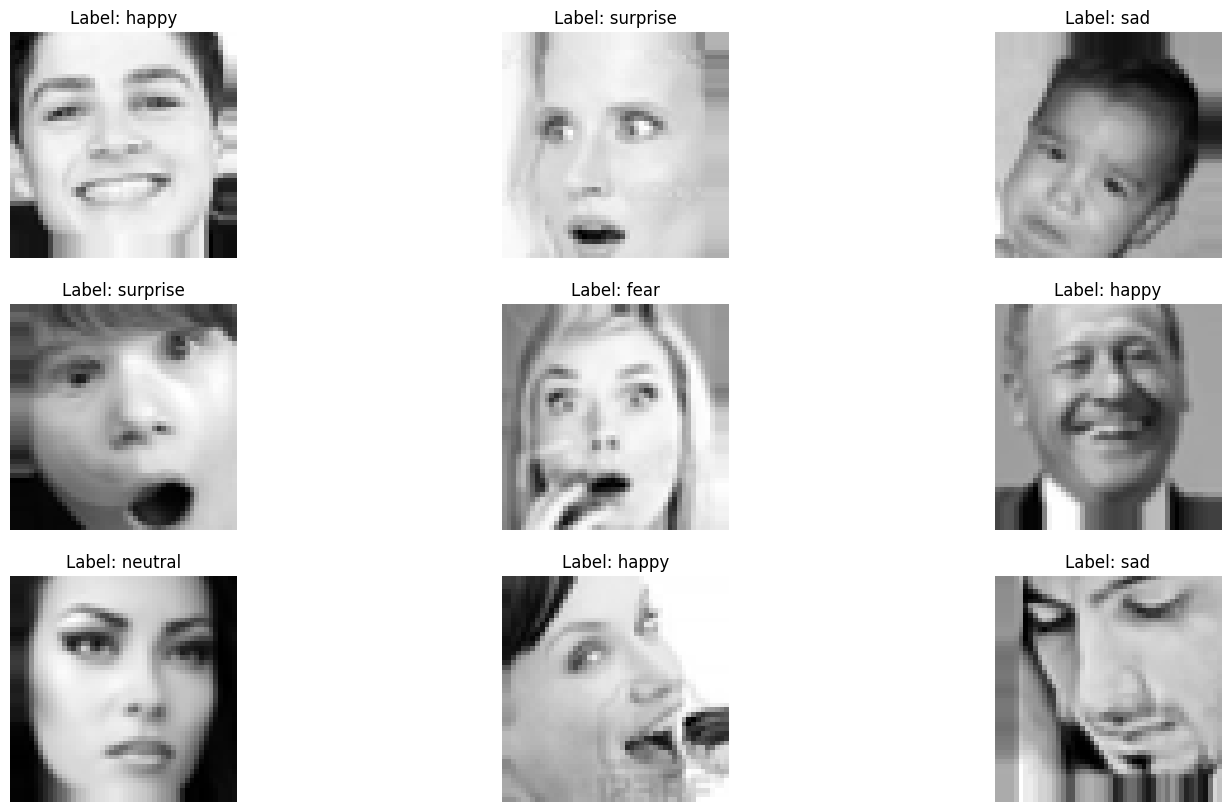

In [17]:
def visualize_samples(generator):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(18, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i].reshape(48, 48), cmap='gray')
        label_index = np.argmax(y_batch[i])
        plt.title(f"Label: {class_names[label_index]}")
        plt.axis('off')
    plt.show()

visualize_samples(train_generator)

IndexError: index 7 is out of bounds for axis 0 with size 7

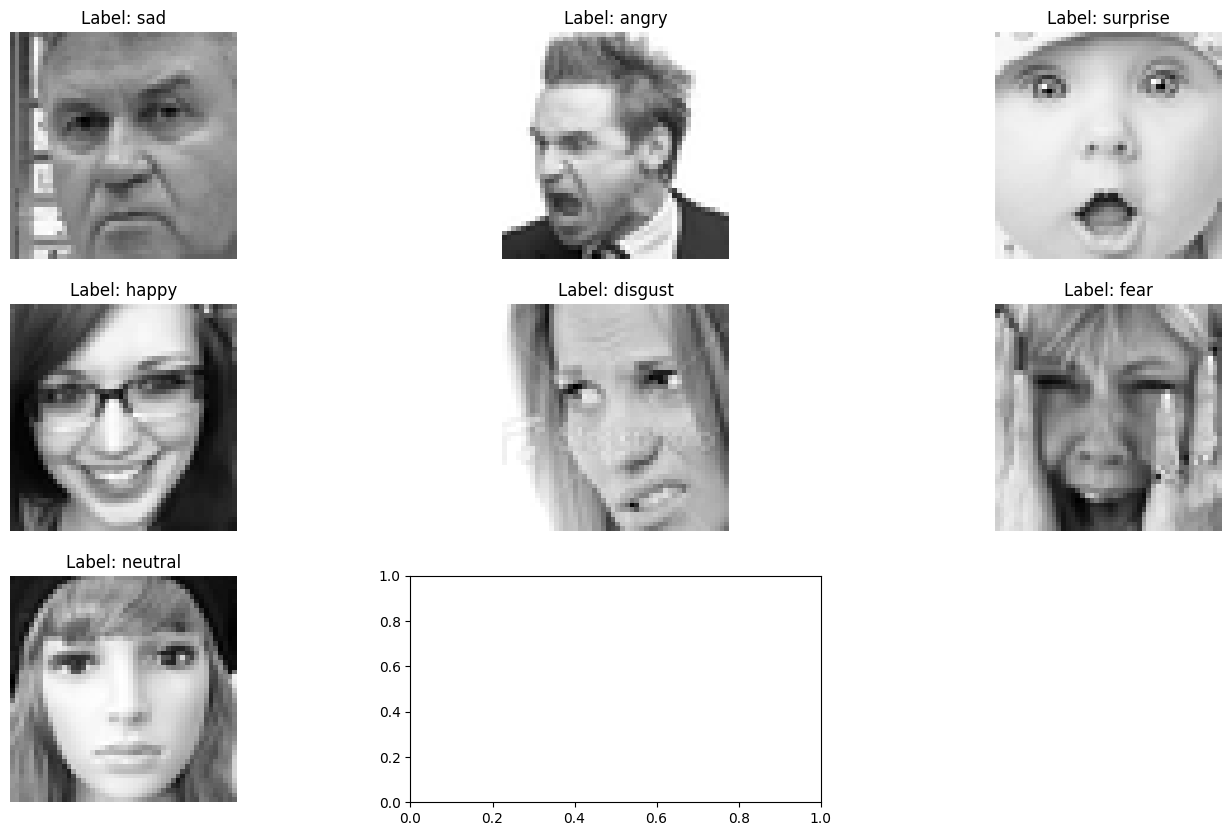

In [18]:
visualize_samples(validation_generator)

In [19]:
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [20]:
train_df

filepaths    labels
0   C:/College/Semester 5/Computer Vision/Project/...     angry
1   C:/College/Semester 5/Computer Vision/Project/...     angry
2   C:/College/Semester 5/Computer Vision/Project/...     angry
3   C:/College/Semester 5/Computer Vision/Project/...     angry
4   C:/College/Semester 5/Computer Vision/Project/...     angry
..                                                ...       ...
68  C:/College/Semester 5/Computer Vision/Project/...  surprise
69  C:/College/Semester 5/Computer Vision/Project/...  surprise
70  C:/College/Semester 5/Computer Vision/Project/...  surprise
71  C:/College/Semester 5/Computer Vision/Project/...  surprise
72  C:/College/Semester 5/Computer Vision/Project/...  surprise

[73 rows x 2 columns]

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(train_df[['filepaths']], train_df['labels'])

balanced_train_df = pd.DataFrame({
    'filepaths': X_resampled['filepaths'],
    'labels': y_resampled
})


C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



In [22]:
balanced_train_df['labels'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [23]:
balanced_train_df['labels'].value_counts()

labels
angry       16
disgust     16
fear        16
happy       16
neutral     16
sad         16
surprise    16
Name: count, dtype: int64

In [24]:
balanced_train_df

filepaths    labels
0    C:/College/Semester 5/Computer Vision/Project/...     angry
1    C:/College/Semester 5/Computer Vision/Project/...     angry
2    C:/College/Semester 5/Computer Vision/Project/...     angry
3    C:/College/Semester 5/Computer Vision/Project/...     angry
4    C:/College/Semester 5/Computer Vision/Project/...     angry
..                                                 ...       ...
107  C:/College/Semester 5/Computer Vision/Project/...       sad
108  C:/College/Semester 5/Computer Vision/Project/...  surprise
109  C:/College/Semester 5/Computer Vision/Project/...  surprise
110  C:/College/Semester 5/Computer Vision/Project/...  surprise
111  C:/College/Semester 5/Computer Vision/Project/...  surprise

[112 rows x 2 columns]

In [25]:
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [26]:
ts_df

filepaths    labels
0   C:/College/Semester 5/Computer Vision/Project/...     angry
1   C:/College/Semester 5/Computer Vision/Project/...     angry
2   C:/College/Semester 5/Computer Vision/Project/...     angry
3   C:/College/Semester 5/Computer Vision/Project/...     angry
4   C:/College/Semester 5/Computer Vision/Project/...     angry
5   C:/College/Semester 5/Computer Vision/Project/...   disgust
6   C:/College/Semester 5/Computer Vision/Project/...   disgust
7   C:/College/Semester 5/Computer Vision/Project/...   disgust
8   C:/College/Semester 5/Computer Vision/Project/...   disgust
9   C:/College/Semester 5/Computer Vision/Project/...   disgust
10  C:/College/Semester 5/Computer Vision/Project/...      fear
11  C:/College/Semester 5/Computer Vision/Project/...      fear
12  C:/College/Semester 5/Computer Vision/Project/...      fear
13  C:/College/Semester 5/Computer Vision/Project/...      fear
14  C:/College/Semester 5/Computer Vision/Project/...      fear
15  C:/College/Semester 5/Computer Vision/Project/...     happy
16  C:/College/Semester 5/Computer Vision/Project/...     happy
17  C:/College/Semester 5/Computer Vision/Project/...     happy
18  C:/College/Semester 5/Computer Vision/Project/...     happy
19  C:/College/Semester 5/Computer Vision/Project/...     happy
20  C:/College/Semester 5/Computer Vision/Project/...   neutral
21  C:/College/Semester 5/Computer Vision/Project/...   neutral
22  C:/College/Semester 5/Computer Vision/Project/...   neutral
23  C:/College/Semester 5/Computer Vision/Project/...   neutral
24  C:/College/Semester 5/Computer Vision/Project/...   neutral
25  C:/College/Semester 5/Computer Vision/Project/...       sad
26  C:/College/Semester 5/Computer Vision/Project/...       sad
27  C:/College/Semester 5/Computer Vision/Project/...       sad
28  C:/College/Semester 5/Computer Vision/Project/...       sad
29  C:/College/Semester 5/Computer Vision/Project/...       sad
30  C:/College/Semester 5/Computer Vision/Project/...  surprise
31  C:/College/Semester 5/Computer Vision/Project/...  surprise
32  C:/College/Semester 5/Computer Vision/Project/...  surprise
33  C:/College/Semester 5/Computer Vision/Project/...  surprise
34  C:/College/Semester 5/Computer Vision/Project/...  surprise
35  C:/College/Semester 5/Computer Vision/Project/...  surprise

In [27]:
ts_df['labels'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [28]:
ts_df['labels'].value_counts()

labels
surprise    6
angry       5
disgust     5
fear        5
happy       5
neutral     5
sad         5
Name: count, dtype: int64

In [29]:
ros = RandomOverSampler(random_state=42)
X_resampled_ts, y_resampled_ts = ros.fit_resample(ts_df[['filepaths']], ts_df['labels'])

balanced_ts_df = pd.DataFrame({
    'filepaths': X_resampled_ts['filepaths'],
    'labels': y_resampled_ts
})


C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



In [30]:
balanced_ts_df

filepaths    labels
0   C:/College/Semester 5/Computer Vision/Project/...     angry
1   C:/College/Semester 5/Computer Vision/Project/...     angry
2   C:/College/Semester 5/Computer Vision/Project/...     angry
3   C:/College/Semester 5/Computer Vision/Project/...     angry
4   C:/College/Semester 5/Computer Vision/Project/...     angry
5   C:/College/Semester 5/Computer Vision/Project/...   disgust
6   C:/College/Semester 5/Computer Vision/Project/...   disgust
7   C:/College/Semester 5/Computer Vision/Project/...   disgust
8   C:/College/Semester 5/Computer Vision/Project/...   disgust
9   C:/College/Semester 5/Computer Vision/Project/...   disgust
10  C:/College/Semester 5/Computer Vision/Project/...      fear
11  C:/College/Semester 5/Computer Vision/Project/...      fear
12  C:/College/Semester 5/Computer Vision/Project/...      fear
13  C:/College/Semester 5/Computer Vision/Project/...      fear
14  C:/College/Semester 5/Computer Vision/Project/...      fear
15  C:/College/Semester 5/Computer Vision/Project/...     happy
16  C:/College/Semester 5/Computer Vision/Project/...     happy
17  C:/College/Semester 5/Computer Vision/Project/...     happy
18  C:/College/Semester 5/Computer Vision/Project/...     happy
19  C:/College/Semester 5/Computer Vision/Project/...     happy
20  C:/College/Semester 5/Computer Vision/Project/...   neutral
21  C:/College/Semester 5/Computer Vision/Project/...   neutral
22  C:/College/Semester 5/Computer Vision/Project/...   neutral
23  C:/College/Semester 5/Computer Vision/Project/...   neutral
24  C:/College/Semester 5/Computer Vision/Project/...   neutral
25  C:/College/Semester 5/Computer Vision/Project/...       sad
26  C:/College/Semester 5/Computer Vision/Project/...       sad
27  C:/College/Semester 5/Computer Vision/Project/...       sad
28  C:/College/Semester 5/Computer Vision/Project/...       sad
29  C:/College/Semester 5/Computer Vision/Project/...       sad
30  C:/College/Semester 5/Computer Vision/Project/...  surprise
31  C:/College/Semester 5/Computer Vision/Project/...  surprise
32  C:/College/Semester 5/Computer Vision/Project/...  surprise
33  C:/College/Semester 5/Computer Vision/Project/...  surprise
34  C:/College/Semester 5/Computer Vision/Project/...  surprise
35  C:/College/Semester 5/Computer Vision/Project/...  surprise
36  C:/College/Semester 5/Computer Vision/Project/...     angry
37  C:/College/Semester 5/Computer Vision/Project/...   disgust
38  C:/College/Semester 5/Computer Vision/Project/...      fear
39  C:/College/Semester 5/Computer Vision/Project/...     happy
40  C:/College/Semester 5/Computer Vision/Project/...   neutral
41  C:/College/Semester 5/Computer Vision/Project/...       sad

In [31]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [32]:
valid_df, test_df = train_test_split(balanced_train_df,  train_size= 0.2, shuffle= True, random_state= 42)

In [33]:
batch_size = 16
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(balanced_train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                     color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe(ts_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 112 validated image filenames belonging to 7 classes.
Found 22 validated image filenames belonging to 7 classes.
Found 36 validated image filenames belonging to 7 classes.


In [34]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [35]:
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same', input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  
    
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)), 
    
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
       
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")  
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     5

In [36]:
model.compile (Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [ ]:
epochs = 50

history = model.fit(train_gen , epochs= epochs , verbose= 1, validation_data= test_gen, shuffle= False)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

# Menentukan EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Pantau 'val_loss', bisa diganti dengan 'val_accuracy' jika diperlukan
    patience=20,            # Jika tidak ada perbaikan selama 20 epoch, pelatihan dihentikan
    restore_best_weights=True  # Mengembalikan bobot terbaik ketika pelatihan dihentikan
)

# Menambahkan EarlyStopping ke dalam fungsi fit
history = model.fit(
    train_gen, 
    epochs=50,  # Tetap menggunakan 50 epoch
    verbose=1, 
    validation_data=test_gen, 
    shuffle=False,
    callbacks=[early_stopping]  # Menambahkan callback EarlyStopping
)


Epoch 1/50
7/7 [==============================] - 18s 283ms/step - loss: 6.2452 - accuracy: 0.1429 - val_loss: 253.9097 - val_accuracy: 0.0833
Epoch 2/50
7/7 [==============================] - 1s 166ms/step - loss: 3.4733 - accuracy: 0.2679 - val_loss: 270.0644 - val_accuracy: 0.1667
Epoch 3/50
7/7 [==============================] - 1s 163ms/step - loss: 2.2609 - accuracy: 0.4643 - val_loss: 116.8187 - val_accuracy: 0.0833
Epoch 4/50
7/7 [==============================] - 1s 163ms/step - loss: 2.0993 - accuracy: 0.5982 - val_loss: 191.4570 - val_accuracy: 0.1667
Epoch 5/50
7/7 [==============================] - 1s 161ms/step - loss: 2.1321 - accuracy: 0.6786 - val_loss: 102.7241 - val_accuracy: 0.2222
Epoch 6/50
7/7 [==============================] - 1s 163ms/step - loss: 1.4555 - accuracy: 0.6250 - val_loss: 30.6812 - val_accuracy: 0.1389
Epoch 7/50
7/7 [==============================] - 1s 161ms/step - loss: 1.9351 - accuracy: 0.6696 - val_loss: 23.9217 - val_accuracy: 0.1111
Epoch 8

In [38]:
loss, accuracy = model.evaluate(test_gen)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

3/3 [==============================] - 0s 31ms/step - loss: 3.6034 - accuracy: 0.2500
Validation Accuracy: 25.00%


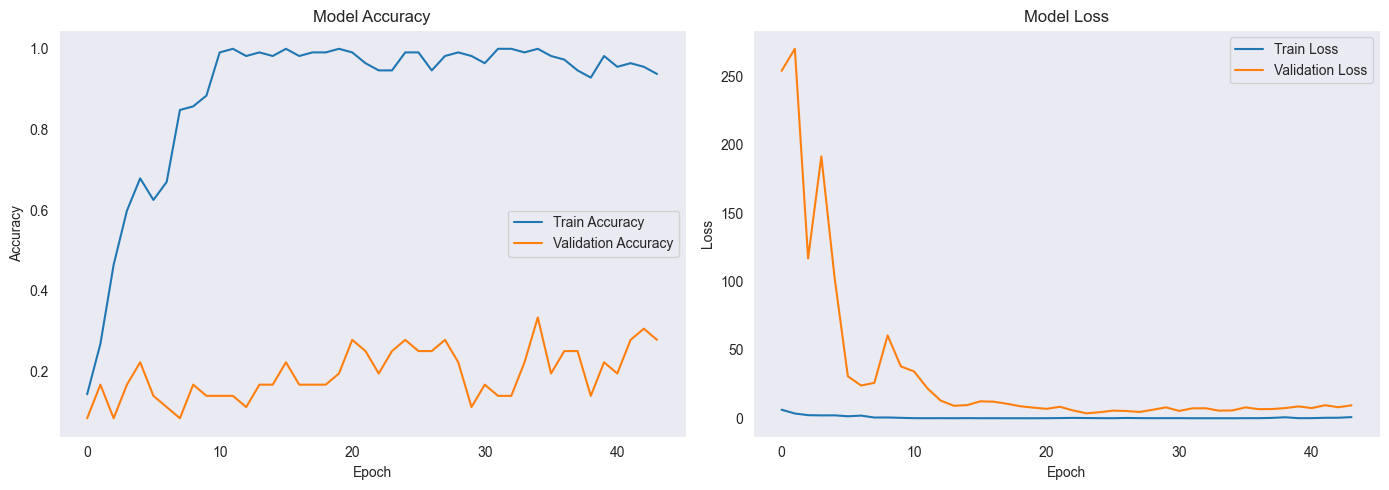

In [39]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

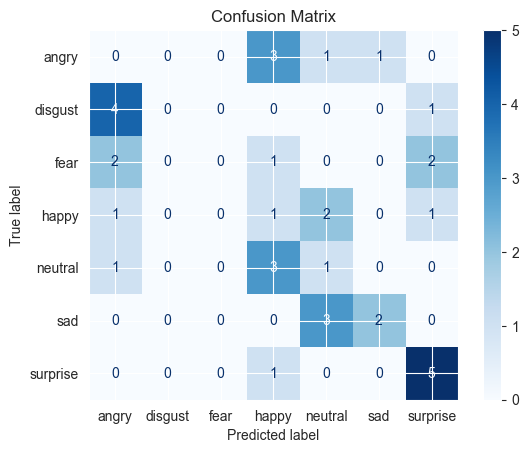

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         5
     disgust       0.00      0.00      0.00         5
        fear       0.00      0.00      0.00         5
       happy       0.11      0.20      0.14         5
     neutral       0.14      0.20      0.17         5
         sad       0.67      0.40      0.50         5
    surprise       0.56      0.83      0.67         6

    accuracy                           0.25        36
   macro avg       0.21      0.23      0.21        36
weighted avg       0.22      0.25      0.22        36



In [40]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen.classes
predicted_labels = model.predict(test_gen)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices.keys())






disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen.class_indices.keys())
print(report)

In [41]:
# Save the model
model.save('cek_classification_emotion_detection_model.h5')

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Add, Flatten, Dense, Input, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define a ResNet block
def resnet_block(inputs, filters, kernel_size=(3, 3), stride=1):
    # First Conv Layer
    x = Conv2D(filters, kernel_size, padding='same', strides=stride)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second Conv Layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Add the shortcut (skip connection)
    shortcut = inputs
    if stride != 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Input shape
input_shape = (224, 224, 1)  # Grayscale images
inputs = Input(shape=input_shape)

# Initial Conv Layer
x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Residual Blocks (ResNet Blocks)
x = resnet_block(x, filters=64)
x = resnet_block(x, filters=128, stride=2)
x = resnet_block(x, filters=256, stride=2)
x = resnet_block(x, filters=512, stride=2)

# Flatten and Dense Layers
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(256, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
outputs = Dense(7, activation="softmax")(x)  # 7 output classes

# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [43]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

# Menentukan EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Pantau 'val_loss', bisa diganti dengan 'val_accuracy' jika diperlukan
    patience=5,            # Jika tidak ada perbaikan selama 5 epoch, pelatihan dihentikan
    restore_best_weights=True  # Mengembalikan bobot terbaik ketika pelatihan dihentikan
)

# Menambahkan EarlyStopping ke dalam fungsi fit
history = model.fit(
    train_gen, 
    epochs=10,  # Tetap menggunakan 10 epoch
    verbose=1, 
    validation_data=test_gen, 
    shuffle=False,
    callbacks=[early_stopping]  # Menambahkan callback EarlyStopping
)


Epoch 1/10
7/7 [==============================] - 4s 122ms/step - loss: 4.4449 - accuracy: 0.0804 - val_loss: 16.8218 - val_accuracy: 0.1389
Epoch 2/10
7/7 [==============================] - 0s 38ms/step - loss: 3.1052 - accuracy: 0.1696 - val_loss: 232.8431 - val_accuracy: 0.1389
Epoch 3/10
7/7 [==============================] - 0s 38ms/step - loss: 2.4317 - accuracy: 0.1071 - val_loss: 295.9496 - val_accuracy: 0.1667
Epoch 4/10
7/7 [==============================] - 0s 39ms/step - loss: 1.9905 - accuracy: 0.1875 - val_loss: 1280.6539 - val_accuracy: 0.1389
Epoch 5/10
7/7 [==============================] - 0s 38ms/step - loss: 2.0326 - accuracy: 0.2232 - val_loss: 960.6014 - val_accuracy: 0.1389
Epoch 6/10
7/7 [==============================] - 0s 40ms/step - loss: 2.0048 - accuracy: 0.1964 - val_loss: 450.4079 - val_accuracy: 0.1389


In [45]:
epochs = 10
history = model.fit(train_gen, epochs=epochs, verbose=1, validation_data=valid_gen, shuffle=False)

Epoch 1/10
7/7 [==============================] - 0s 76ms/step - loss: 2.6932 - accuracy: 0.1607 - val_loss: 25.7459 - val_accuracy: 0.0909
Epoch 2/10
7/7 [==============================] - 0s 38ms/step - loss: 2.1764 - accuracy: 0.1518 - val_loss: 99.3292 - val_accuracy: 0.1364
Epoch 3/10
7/7 [==============================] - 0s 37ms/step - loss: 2.1530 - accuracy: 0.0982 - val_loss: 121.7823 - val_accuracy: 0.0909
Epoch 4/10
7/7 [==============================] - 0s 37ms/step - loss: 2.0182 - accuracy: 0.2143 - val_loss: 103.8404 - val_accuracy: 0.1364
Epoch 5/10
7/7 [==============================] - 0s 37ms/step - loss: 2.0278 - accuracy: 0.2054 - val_loss: 87.3185 - val_accuracy: 0.0455
Epoch 6/10
7/7 [==============================] - 0s 39ms/step - loss: 1.8410 - accuracy: 0.2321 - val_loss: 93.6348 - val_accuracy: 0.1364
Epoch 7/10
7/7 [==============================] - 0s 37ms/step - loss: 1.7982 - accuracy: 0.2679 - val_loss: 92.7416 - val_accuracy: 0.0909
Epoch 8/10
7/7 [==

In [46]:
test_gen_new = ts_gen.flow_from_dataframe(balanced_ts_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 42 validated image filenames belonging to 7 classes.


In [47]:
loss, accuracy = model.evaluate(test_gen)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

3/3 [==============================] - 0s 8ms/step - loss: 30.0001 - accuracy: 0.1389
Validation Accuracy: 13.89%


In [48]:
loss, accuracy = model.evaluate(test_gen_new)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

3/3 [==============================] - 0s 112ms/step - loss: 29.5217 - accuracy: 0.1190
Validation Accuracy: 11.90%


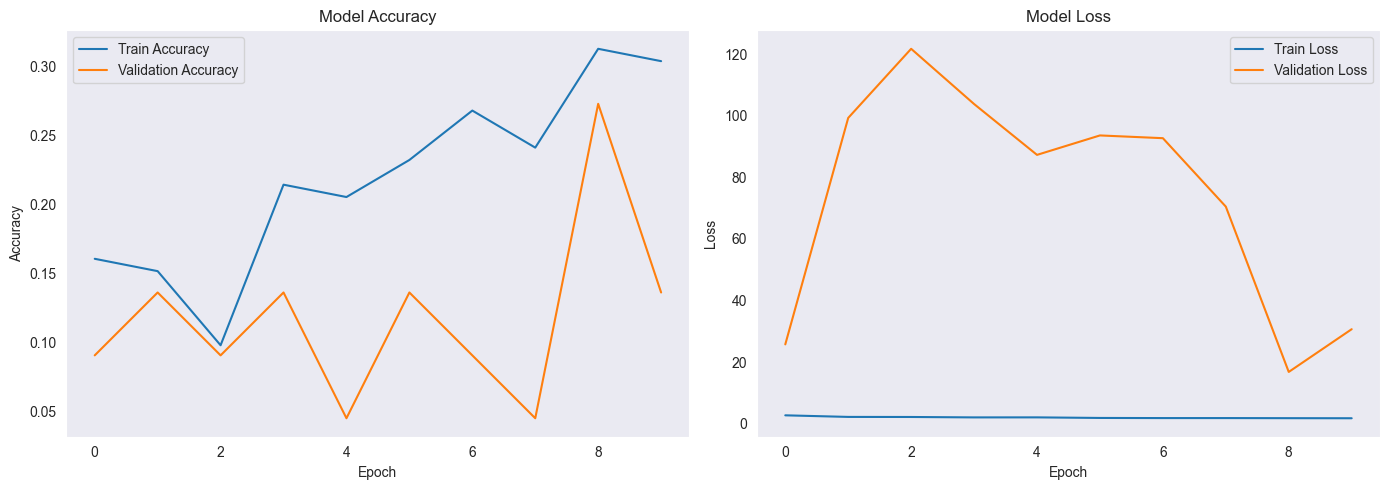

In [49]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

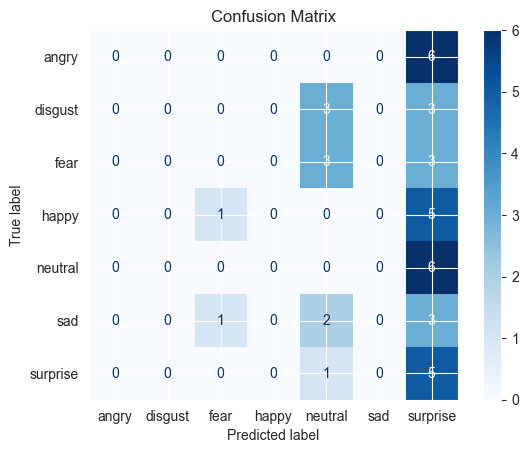

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         6
     disgust       0.00      0.00      0.00         6
        fear       0.00      0.00      0.00         6
       happy       0.00      0.00      0.00         6
     neutral       0.00      0.00      0.00         6
         sad       0.00      0.00      0.00         6
    surprise       0.16      0.83      0.27         6

    accuracy                           0.12        42
   macro avg       0.02      0.12      0.04        42
weighted avg       0.02      0.12      0.04        42



In [50]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [51]:
train_df_new, temp_df_new = train_test_split(
    balanced_train_df,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=balanced_train_df['labels']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['labels'] 
)

In [52]:
batch_size = 16
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen_new = tr_gen.flow_from_dataframe(train_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

valid_gen_new = ts_gen.flow_from_dataframe(valid_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                     color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

test_gen_new = ts_gen.flow_from_dataframe(test_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 89 validated image filenames belonging to 7 classes.
Found 11 validated image filenames belonging to 7 classes.
Found 12 validated image filenames belonging to 7 classes.


In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Add, Flatten, Dense, Input, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def resnet_block(inputs, filters, kernel_size=(3, 3), stride=1):
    # First Conv Layer
    x = Conv2D(filters, kernel_size, padding='same', strides=stride)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second Conv Layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Add the shortcut (skip connection)
    shortcut = inputs
    if stride != 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Input shape
input_shape = (224, 224, 1)  # Grayscale images
inputs = Input(shape=input_shape)

# Initial Conv Layer
x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Residual Blocks (ResNet Blocks)
x = resnet_block(x, filters=64)
x = resnet_block(x, filters=128, stride=2)
x = resnet_block(x, filters=256, stride=2)
x = resnet_block(x, filters=512, stride=2)

# Flatten and Dense Layers
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(256, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
outputs = Dense(7, activation="softmax")(x)  # 7 output classes

# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [54]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
epochs = 15
history = model.fit(train_gen_new, epochs=epochs, verbose=1, validation_data=valid_gen_new, shuffle=False)

Epoch 1/15
6/6 [==============================] - 3s 300ms/step - loss: 4.1016 - accuracy: 0.1461 - val_loss: 64.8211 - val_accuracy: 0.0909
Epoch 2/15
6/6 [==============================] - 0s 36ms/step - loss: 4.1118 - accuracy: 0.0899 - val_loss: 1419.4718 - val_accuracy: 0.0909
Epoch 3/15
6/6 [==============================] - 0s 35ms/step - loss: 3.0010 - accuracy: 0.1124 - val_loss: 2181.0764 - val_accuracy: 0.0909
Epoch 4/15
6/6 [==============================] - 0s 36ms/step - loss: 2.1646 - accuracy: 0.1348 - val_loss: 1050.9298 - val_accuracy: 0.1818
Epoch 5/15
6/6 [==============================] - 0s 34ms/step - loss: 2.4460 - accuracy: 0.1236 - val_loss: 272.0392 - val_accuracy: 0.1818
Epoch 6/15
6/6 [==============================] - 0s 33ms/step - loss: 2.0025 - accuracy: 0.1910 - val_loss: 301.3489 - val_accuracy: 0.1818
Epoch 7/15
6/6 [==============================] - 0s 35ms/step - loss: 1.9608 - accuracy: 0.1798 - val_loss: 253.7001 - val_accuracy: 0.1818
Epoch 8/15

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

# Menentukan EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Pantau 'val_loss', bisa diganti dengan 'val_accuracy' jika diperlukan
    patience=10,            # Jika tidak ada perbaikan selama 10 epoch, pelatihan dihentikan
    restore_best_weights=True  # Mengembalikan bobot terbaik ketika pelatihan dihentikan
)

# Menambahkan EarlyStopping ke dalam fungsi fit
history = model.fit(
    train_gen, 
    epochs=50,  # Tetap menggunakan 50 epoch
    verbose=1, 
    validation_data=test_gen, 
    shuffle=False,
    callbacks=[early_stopping]  # Menambahkan callback EarlyStopping
)


Epoch 1/50
7/7 [==============================] - 0s 43ms/step - loss: 1.8390 - accuracy: 0.2857 - val_loss: 6.6885 - val_accuracy: 0.0833
Epoch 2/50
7/7 [==============================] - 0s 38ms/step - loss: 1.5886 - accuracy: 0.4018 - val_loss: 7.3254 - val_accuracy: 0.0833
Epoch 3/50
7/7 [==============================] - 0s 38ms/step - loss: 1.5100 - accuracy: 0.4821 - val_loss: 4.7380 - val_accuracy: 0.0556
Epoch 4/50
7/7 [==============================] - 0s 38ms/step - loss: 1.2608 - accuracy: 0.5714 - val_loss: 7.8532 - val_accuracy: 0.1111
Epoch 5/50
7/7 [==============================] - 0s 38ms/step - loss: 1.3058 - accuracy: 0.5268 - val_loss: 4.4903 - val_accuracy: 0.0833
Epoch 6/50
7/7 [==============================] - 0s 38ms/step - loss: 0.9676 - accuracy: 0.6875 - val_loss: 4.5433 - val_accuracy: 0.0556
Epoch 7/50
7/7 [==============================] - 0s 39ms/step - loss: 0.7949 - accuracy: 0.7232 - val_loss: 3.9384 - val_accuracy: 0.0833
Epoch 8/50
7/7 [===========

In [57]:
model.save('cek_classification_emotion_detection_model.h5')

In [58]:
loss, accuracy = model.evaluate(test_gen_new)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 321ms/step - loss: 2.2760 - accuracy: 0.3333
Test Accuracy: 33.33%


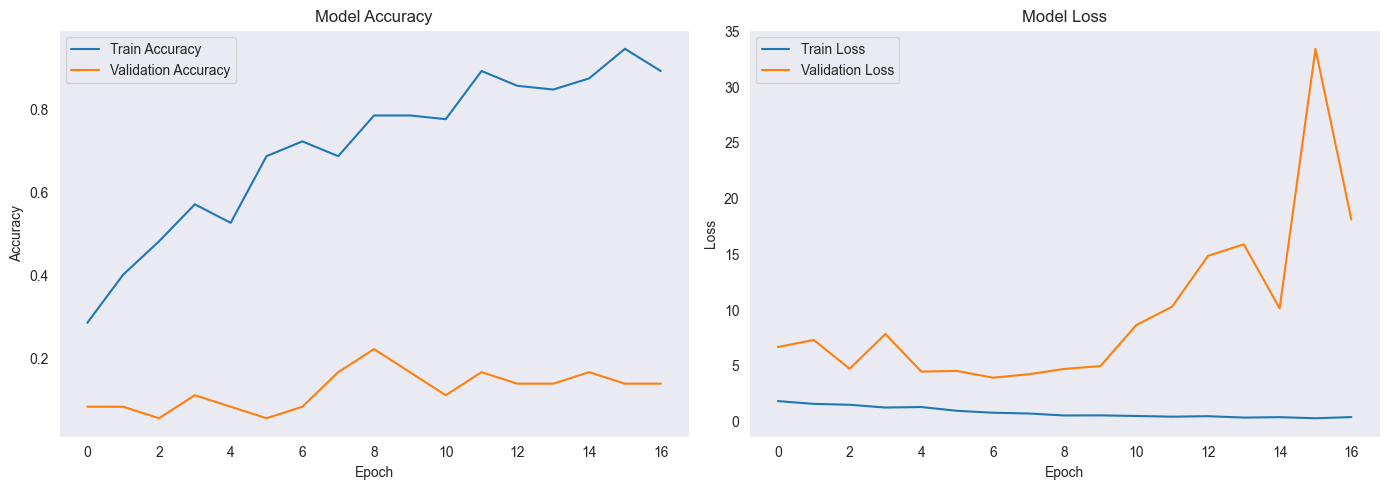

In [59]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

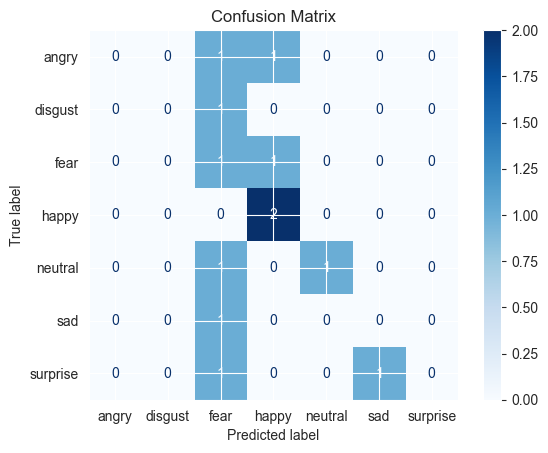

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         2
     disgust       0.00      0.00      0.00         1
        fear       0.17      0.50      0.25         2
       happy       0.50      1.00      0.67         2
     neutral       1.00      0.50      0.67         2
         sad       0.00      0.00      0.00         1
    surprise       0.00      0.00      0.00         2

    accuracy                           0.33        12
   macro avg       0.24      0.29      0.23        12
weighted avg       0.28      0.33      0.26        12



In [60]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [61]:
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same', input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  
    
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)), 
    
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
       
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")  
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_28 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_29 (Batc (None, 112, 112, 128)    

In [62]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [63]:
model.save('cek_classification_emotion_detection_model.h5')

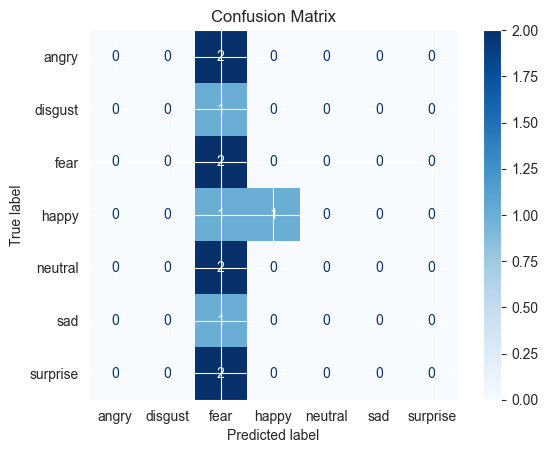

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         2
     disgust       0.00      0.00      0.00         1
        fear       0.18      1.00      0.31         2
       happy       1.00      0.50      0.67         2
     neutral       0.00      0.00      0.00         2
         sad       0.00      0.00      0.00         1
    surprise       0.00      0.00      0.00         2

    accuracy                           0.25        12
   macro avg       0.17      0.21      0.14        12
weighted avg       0.20      0.25      0.16        12



In [64]:
true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [65]:
# Save the model
model.save('cek_classification_emotion_detection_model.h5')

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_28 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_29 (Batc (None, 112, 112, 128)    

In [69]:
import cv2
import numpy as np

# Load pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize camera
cap = cv2.VideoCapture(0)

# Emotion labels corresponding to model's output classes
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Assuming model is already loaded, e.g., model = tf.keras.models.load_model('path_to_model')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]  # Crop the face region
        
        # Ensure face is resized properly to match the input size expected by the model
        face = cv2.resize(face, (48, 48))  # Resize to 48x48 or another size expected by your model
        
        # Normalize the pixel values to [0, 1]
        face = face / 255.0
        
        # Add channel and batch dimensions for grayscale (single channel)
        face = np.expand_dims(face, axis=-1)  # Add channel dimension (for grayscale, 1 channel)
        face = np.expand_dims(face, axis=0)  # Add batch dimension (for single image)
        
        # Predict emotion
        predictions = model.predict(face)
        emotion = emotion_labels[np.argmax(predictions[0])]

        # Draw bounding box and label on the frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Display the frame with predicted emotion
    cv2.imshow('Classification Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


ValueError: in user code:

    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_28 is incompatible with the layer: expected axis -1 of input shape to have value 100352 but received input with shape (None, 4608)


In [67]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained model
##model = tf.keras.models.load_model('child_emotion_detection_model.h5')  # Adjust the path if necessary

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']  # Adjust if you have different labels

# Initialize the camera
cap = cv2.VideoCapture(0)  # 0 for the default camera

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale and resize for model input
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(gray, (48, 48))  # Ensure this matches your model's input size
    face = face / 255.0  # Normalize
    face = img_to_array(face)
    face = np.expand_dims(face, axis=0)

    # Predict emotion
    predictions = model.predict(face)
    max_index = np.argmax(predictions[0])
    emotion = emotion_labels[max_index]

    # Display the resulting frame
    cv2.putText(frame, f'Emotion: {emotion}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    cv2.imshow('Classification Emotion Detection', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()


ValueError: in user code:

    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_21 is incompatible with the layer: expected axis -1 of input shape to have value 100352 but received input with shape (None, 4608)


In [68]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained model
model = tf.keras.models.load_model('child_emotion_detection_model.h5')  # Adjust the path if necessary

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']  # Adjust if you have different labels

# Initialize the camera
cap = cv2.VideoCapture(0)  # 0 for the default camera

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale and resize for model input
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(gray, (48, 48))  # Ensure this matches your model's input size
    face = face / 255.0  # Normalize
    face = img_to_array(face)
    face = np.expand_dims(face, axis=0)

    # Predict emotion
    predictions = model.predict(face)
    max_index = np.argmax(predictions[0])
    emotion = emotion_labels[max_index]

    # Display the resulting frame
    cv2.putText(frame, f'Emotion: {emotion}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    cv2.imshow('Classification Emotion Detection', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()


ValueError: in user code:

    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_21 is incompatible with the layer: expected axis -1 of input shape to have value 100352 but received input with shape (None, 4608)
